# The Sparks Foundation-GRIP Internship

## Data Science & Business Analytics Intern- Yashika Chugh

# Task 2: Prediction Using Unsupervised ML #

## K-Means Clustering ##
We will predict the optimum number of clusters in the 'iris' dataset using K-means clustering. 
K-means clustering is an unsupervised clustering method where we can predict the groupings within an unlabeled dataset based on the number of centroids(K) and nearest mean value.

### Importing Libraries

In [23]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets

In [4]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

### Loading Data

In [45]:
# Loading Data

iris = datasets.load_iris()
X = iris.data
y = iris.target
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### Finding Optimum Number of Clusters Using  Silhouette Plot

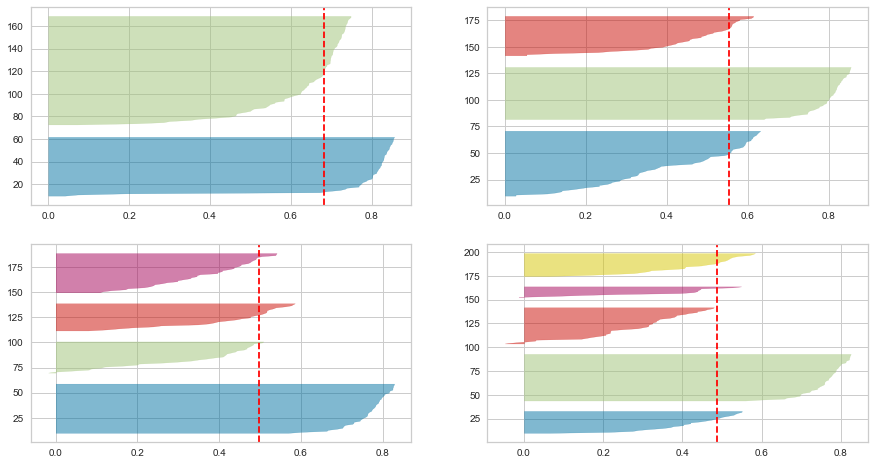

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

The deciding point is the thickness of the silhouette plot representing each cluster. It can be clearly seen from the above plots that optimal number of clusters = 3 because the  thickness of plot with three clusters is uniform while plots with numbers of clusters as 2,4,5 shows wider fluctuations in thickness.

### Building KMeans Classifier

In [21]:
clustering = KMeans(n_clusters=3,init = 'k-means++',
                max_iter = 300, n_init = 10, random_state=5)

clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [30]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
iris_df_1 = pd.DataFrame(iris.target)
iris_df_1.columns = ['Targets']


### Visualizing the Clusters

Text(0.5, 1.0, 'K-Means Classification')

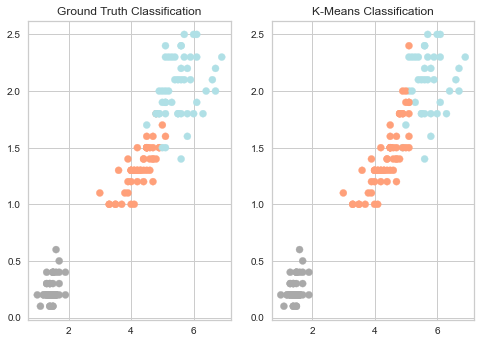

In [46]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])
relabel = np.choose(clustering.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')


### Evaluating the Model

In [44]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



Classification report suggests high recall and high precision which describes model's completeness and relevancy respectively.

### Thank You !